In [12]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from src.feature_engineering import (
    apply_feature_engineering,
    drop_all_zero_entries,
    choose_acc_ids,
)
import yaml

In [13]:
acc_config_path = Path("../config/acc_config.yaml")
with open(acc_config_path, "r") as yaml_file:
    acc_config = yaml.safe_load(yaml_file)

## Choose Account to have a look at

In [14]:
CATEGORY = "Aufwand"

In [15]:
# Replace with your actual data loading code
file_path = Path("../data/final/merged_complete.csv")
df = pd.read_csv(file_path, index_col=None, header=0)

# Convert 'Year' to a relative year
# df["Year"] = df["Year"] - df["Year"].min()

# Sort dataframe and apply feature engineering
df = df.sort_values(by="Year")
df = apply_feature_engineering(df)
df = drop_all_zero_entries(df)
df = choose_acc_ids(df, acc_config.get(CATEGORY)) # Choose your account
df = df.drop_duplicates(subset=['Year', 'Region', 'Acc-ID'], keep='first')


In [16]:
# Calculate the percentage difference and handle division by zero
df['Percentage Difference'] = ((df['Budget y'] - df['Realized']) / df['Realized']).replace([np.inf, -np.inf], np.nan) * 100

In [17]:
# Clip the percentage difference to the 1% and 99% quantile
low_quantile = df['Percentage Difference'].quantile(0.01)
high_quantile = df['Percentage Difference'].quantile(0.99)

df = df[(df['Percentage Difference'] >= low_quantile) & (df['Percentage Difference'] <= high_quantile)]

In [18]:
df.tail()

,Year,Region,Acc-ID,Realized,Budget y,Budget y+1,Slack,Alter 0–19,Gebiete ausserhalb des Einflusses städtischer Kerne,Wanderungssaldo Zu-und Wegzüge,Betreibungshandlungen Pfändungsvollzüge,Realized_1yr_lag,Realized_2yr_lag,Percentage Difference
10121,2022.0,GR,38.0,79712.000,0.0,0.0,0.000,35349,111392,-140,18394,67000.0,40129.8,-100.000000
10069,2022.0,GL,37.0,26925.044,26545.7,26552.0,-379.344,7968,9528,44,3702,44636.4,26560.7,-1.408889
10070,2022.0,GL,39.0,34740.680,29228.3,27991.0,-5512.380,7968,9528,44,3702,28670.2,28642.8,-15.867220
10079,2022.0,GL,34.0,29970.451,7412.6,7278.4,-22557.851,7968,9528,44,3702,29351.0,21829.3,-75.266972
10081,2022.0,GL,38.0,20191.072,0.0,0.0,0.000,7968,9528,44,3702,10866.7,9966.6,-100.000000


In [19]:
df.describe()

,Year,Acc-ID,Realized,Budget y,Budget y+1,Slack,Alter 0–19,Gebiete ausserhalb des Einflusses städtischer Kerne,Wanderungssaldo Zu-und Wegzüge,Betreibungshandlungen Pfändungsvollzüge,Realized_1yr_lag,Realized_2yr_lag,Percentage Difference
count,1929.000000,1929.000000,1.929000e+03,1.929000e+03,1.929000e+03,1.929000e+03,1929.000000,1929.000000,1929.000000,1929.000000,1.736000e+03,1.618000e+03,1929.000000
mean,2017.237429,34.557284,5.204638e+05,4.912657e+05,4.972539e+05,-1.205464e+04,63955.129082,52073.867289,46.563504,58465.049767,4.955249e+05,4.980981e+05,-8.579412
std,3.515176,3.110510,1.047005e+06,9.893467e+05,1.019298e+06,8.509883e+04,67088.224956,60909.291344,1047.000122,61699.873967,1.024864e+06,1.014580e+06,27.113589
min,2011.000000,30.000000,-1.792430e+05,0.000000e+00,-3.390000e+02,-2.632937e+06,3392.000000,0.000000,-5123.000000,329.000000,0.000000e+00,-1.792430e+05,-100.000000
25%,2014.000000,31.000000,3.279390e+04,2.746970e+04,2.506208e+04,-5.916348e+03,15014.000000,9561.000000,-270.000000,8957.000000,2.562822e+04,2.527451e+04,-4.933819
50%,2018.000000,35.000000,1.585051e+05,1.306190e+05,1.156661e+05,-2.970280e+01,38110.000000,27151.000000,34.000000,40103.000000,1.252286e+05,1.330060e+05,-0.312067
75%,2020.000000,37.000000,4.314457e+05,4.249540e+05,4.273827e+05,2.493353e+03,82723.000000,85601.000000,591.000000,84813.000000,4.191471e+05,4.286204e+05,1.899757
max,2022.000000,39.000000,8.308586e+06,7.185690e+06,7.544496e+06,2.222759e+05,312392.000000,265215.000000,3429.000000,252042.000000,7.849810e+06,8.308586e+06,56.974202


In [20]:
highest_dev = df.sort_values(by='Percentage Difference', ascending=False).head(10)
highest_dev

,Year,Region,Acc-ID,Realized,Budget y,Budget y+1,Slack,Alter 0–19,Gebiete ausserhalb des Einflusses städtischer Kerne,Wanderungssaldo Zu-und Wegzüge,Betreibungshandlungen Pfändungsvollzüge,Realized_1yr_lag,Realized_2yr_lag,Percentage Difference
575,2021.0,OW,34.0,228.70000,359.0,349.8,130.30000,7612,27785,85,2667,233.80000,256.50000,56.974202
6224,2012.0,BL,39.0,175.90000,276.0,174.6,100.10000,53963,7001,-155,37775,15672.50000,37176.70000,56.907334
10639,2022.0,VD,34.0,31159.10000,47697.9,19482.0,16538.80000,180828,86144,-1595,227960,39411.90000,36455.00000,53.078555
855,2021.0,UR,34.0,622.19573,951.1,719.0,328.90427,7366,4332,-17,2313,736.64343,632.49100,52.861866
2590,2011.0,AI,34.0,19.90000,30.0,67.0,10.10000,3749,15743,-45,377,NaN,NaN,50.753769
3703,2020.0,VD,34.0,36455.00000,54576.5,50620.8,18121.50000,178201,84266,-699,225949,37503.00000,33996.07696,49.709231
6581,2016.0,ZH,37.0,434738.98065,647813.0,388318.5,213074.01935,293045,10136,2114,196937,633555.76825,633057.67477,49.011943
5594,2019.0,VS,33.0,67255.97056,100212.3,83624.5,32956.32944,67783,72910,1099,99147,NaN,NaN,49.001344
3530,2020.0,SZ,33.0,24340.00000,36073.4,30494.0,11733.40000,31099,28945,789,12392,33978.90000,NaN,48.206245
10506,2022.0,TG,33.0,30979.80000,45693.0,44899.7,14713.20000,58864,95522,676,30322,51158.00000,42153.00000,47.492882


## Aggregated Relative Difference

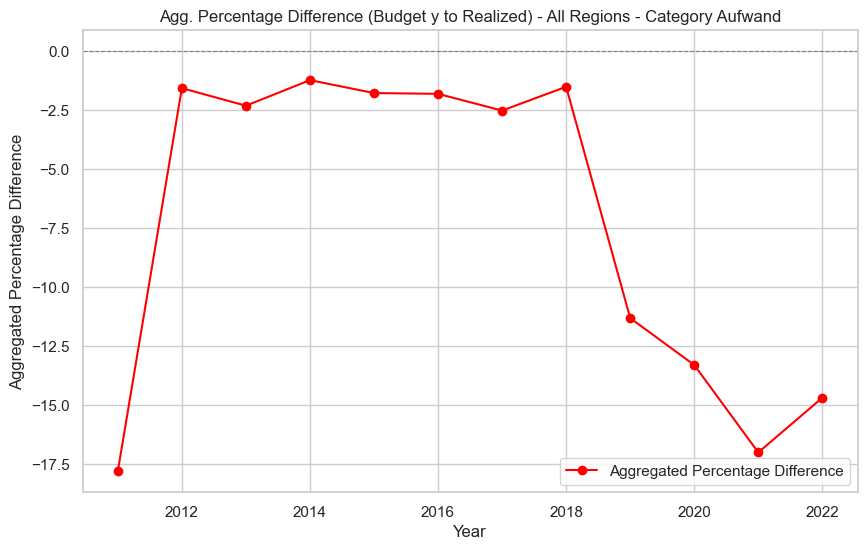

In [21]:
aggregated_data = df.groupby('Year')['Percentage Difference'].mean()

plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data, marker='o', linestyle='-', color='red', label='Aggregated Percentage Difference')
plt.title(f'Agg. Percentage Difference (Budget y to Realized) - All Regions - Category {CATEGORY}')
plt.xlabel('Year')
plt.ylabel('Aggregated Percentage Difference')
plt.axhline(0, color='grey', lw=0.8, ls='--')  
plt.legend()
plt.show()


## Relative Difference per Region

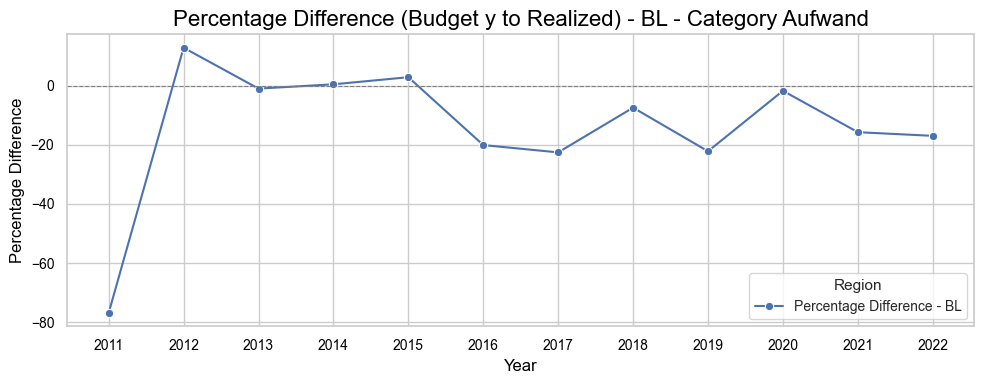

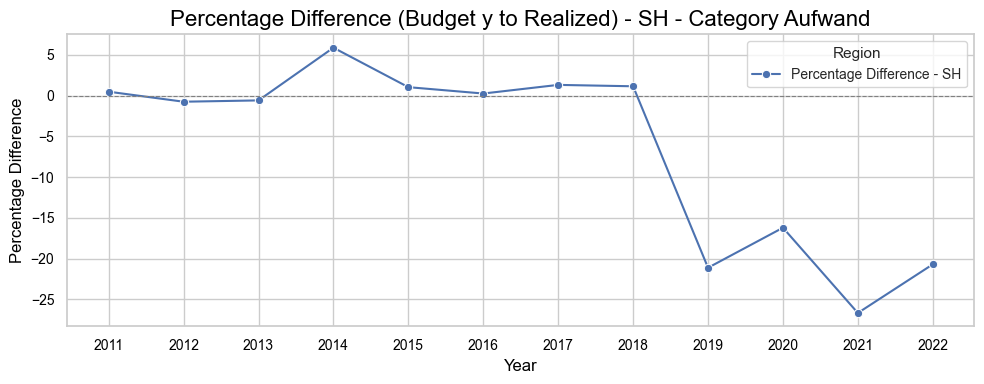

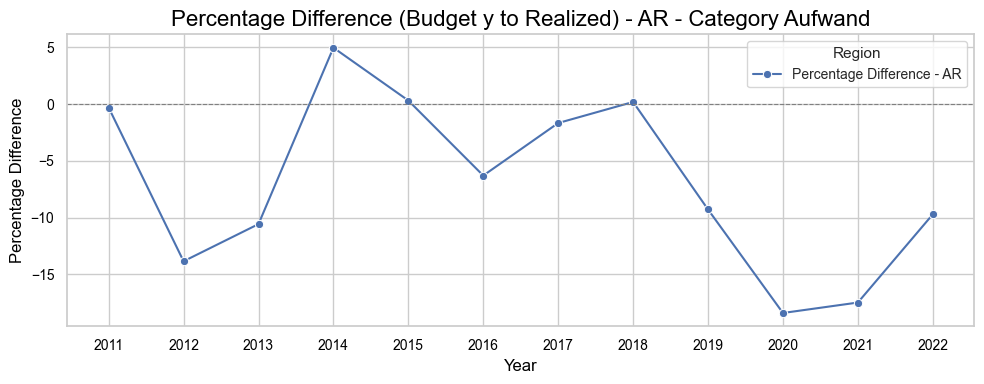

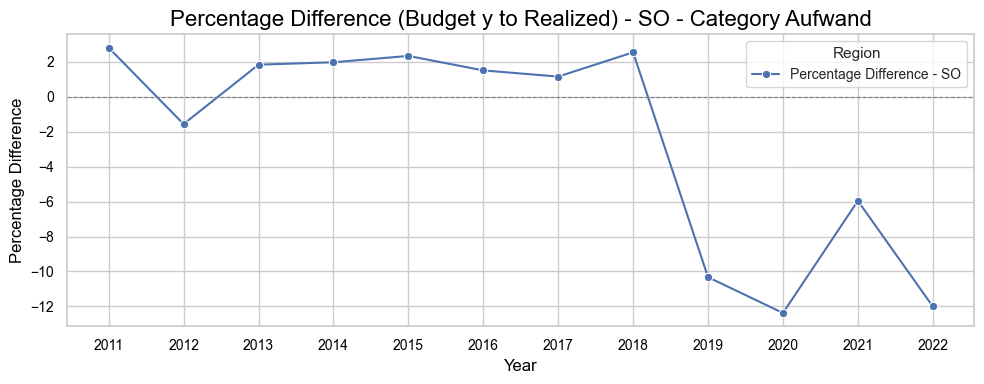

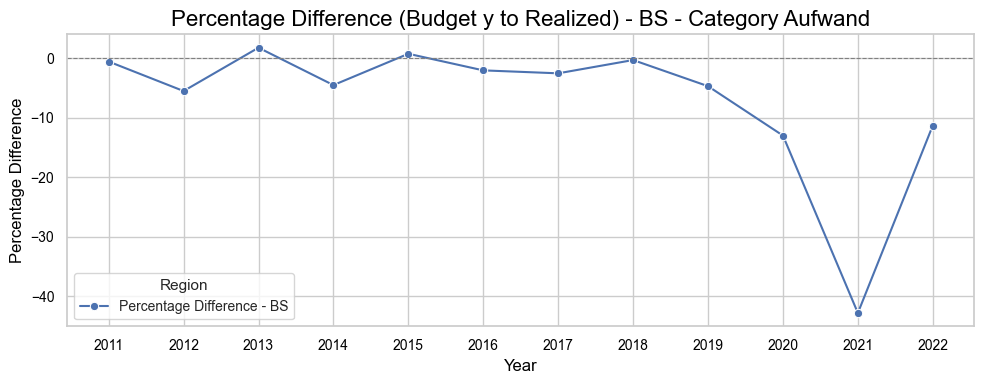

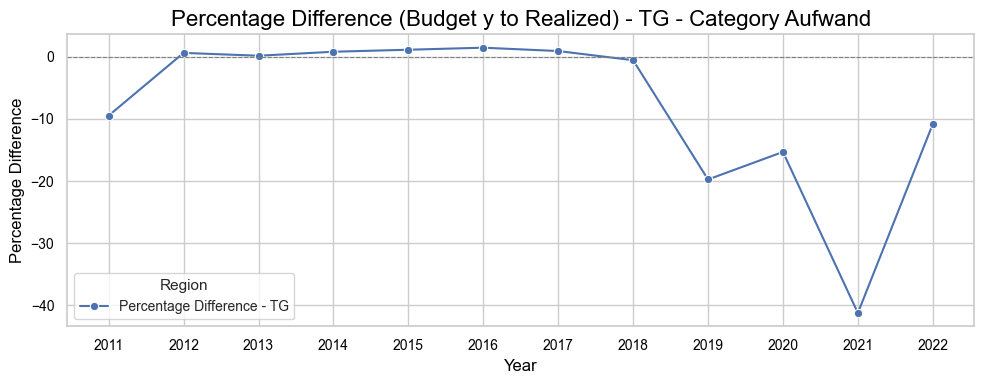

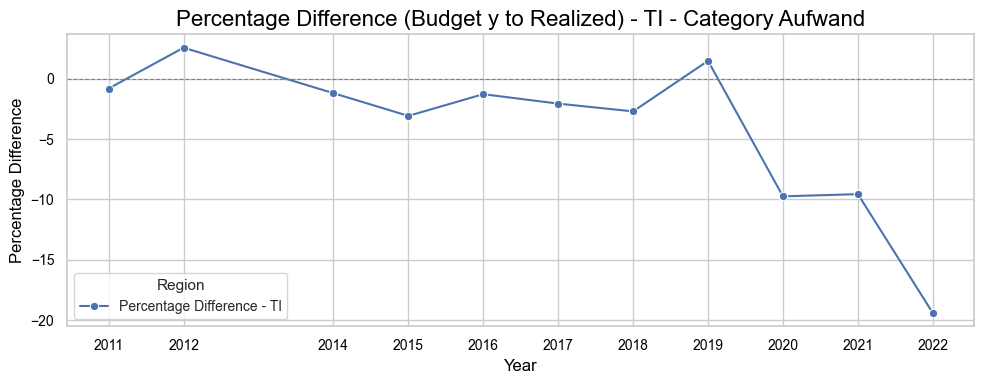

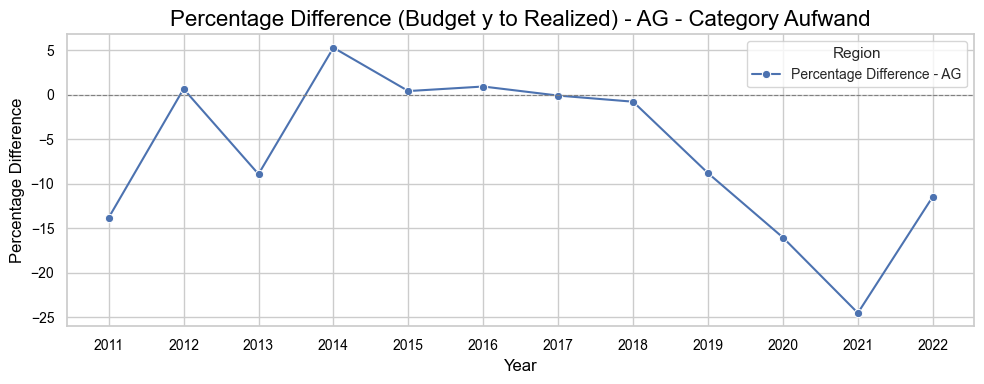

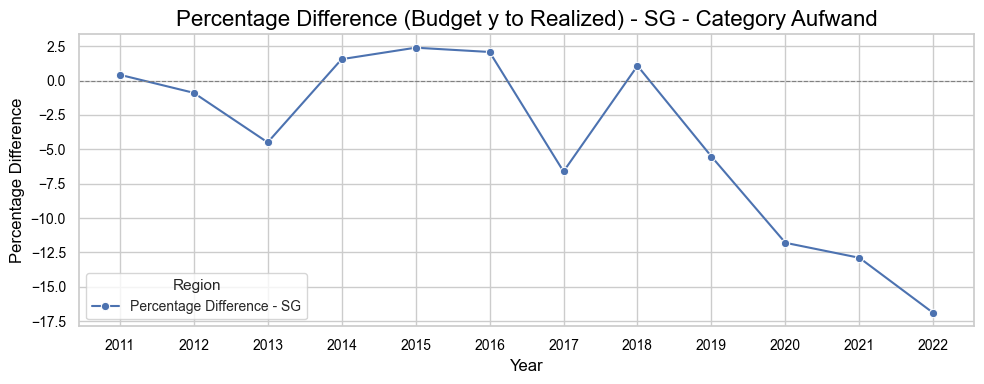

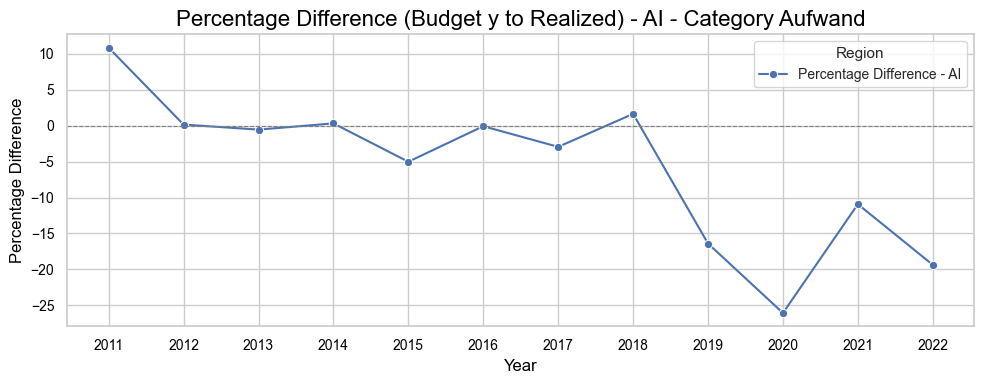

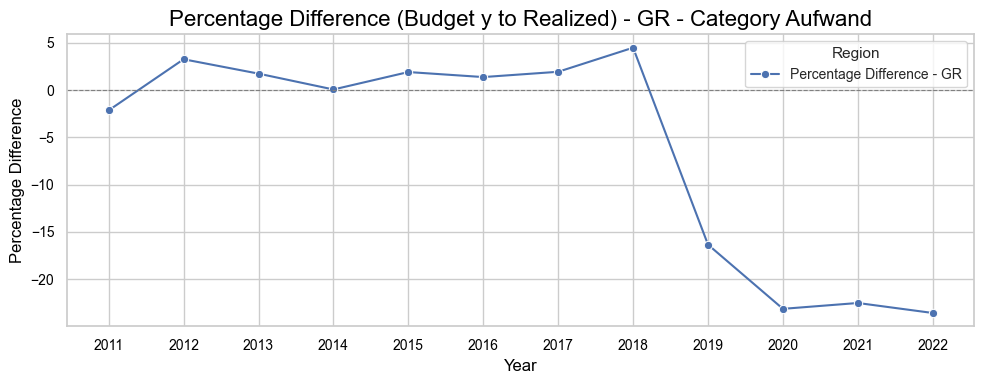

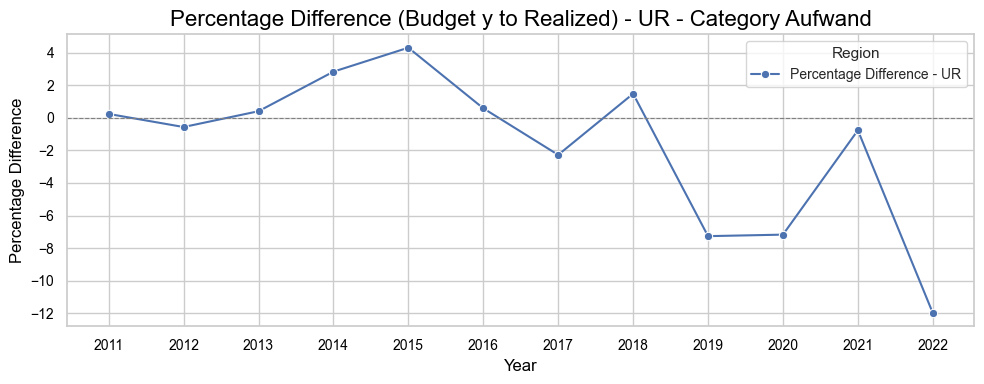

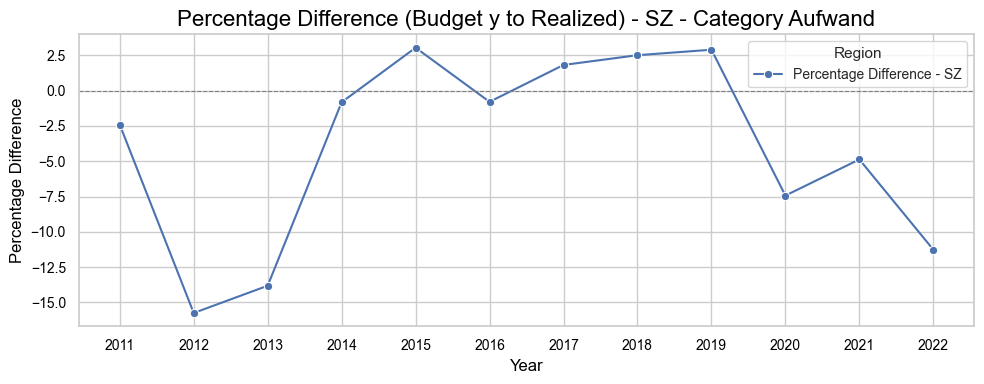

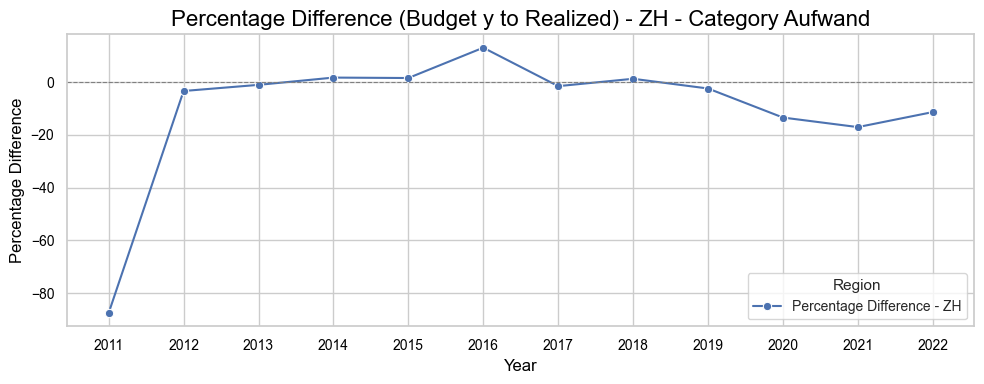

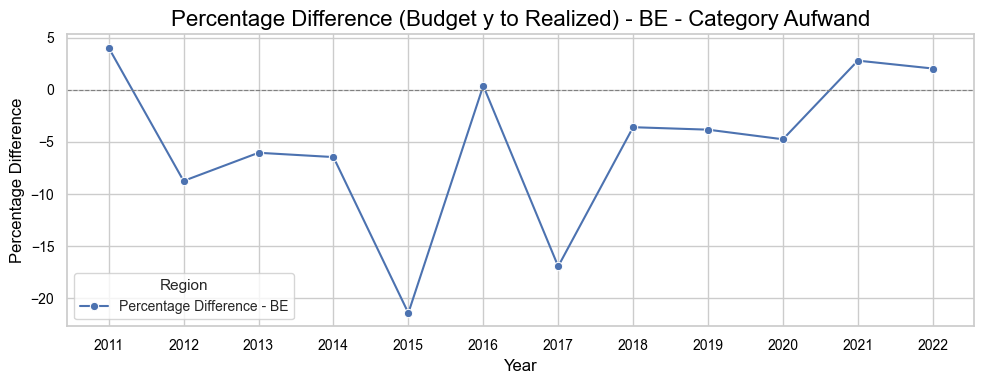

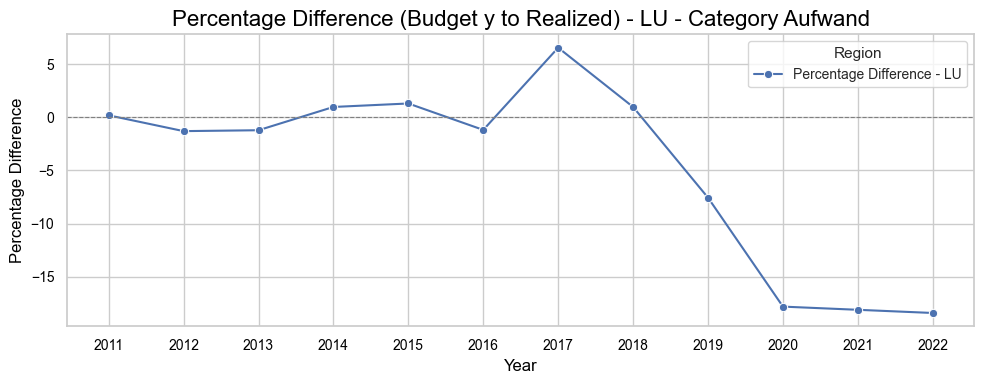

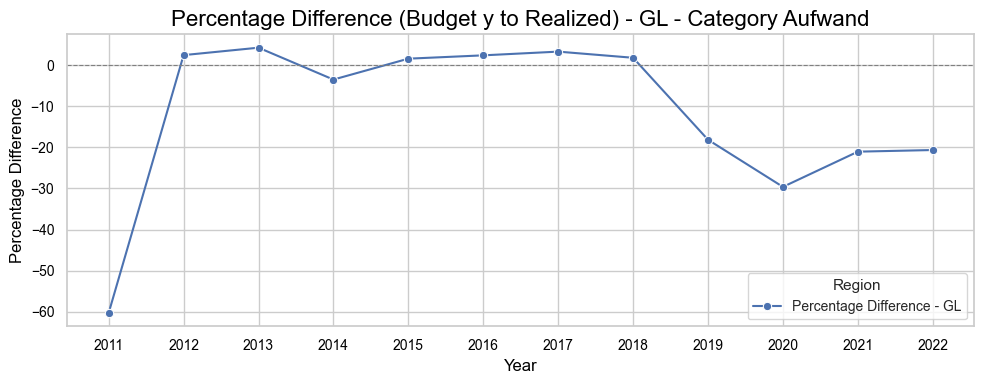

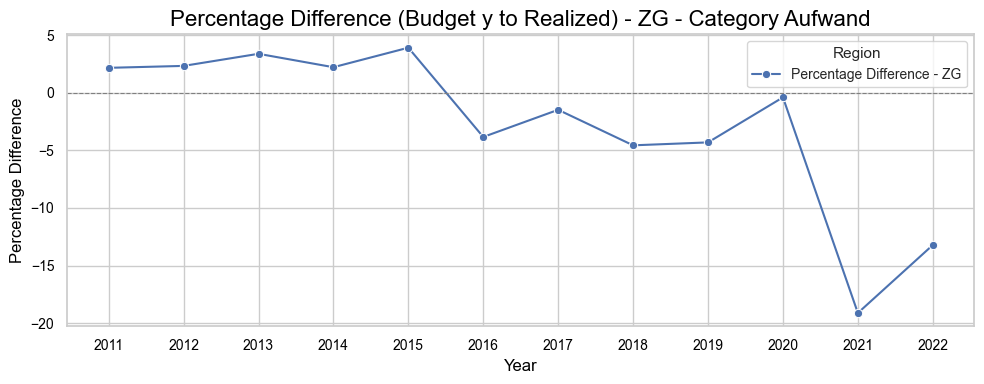

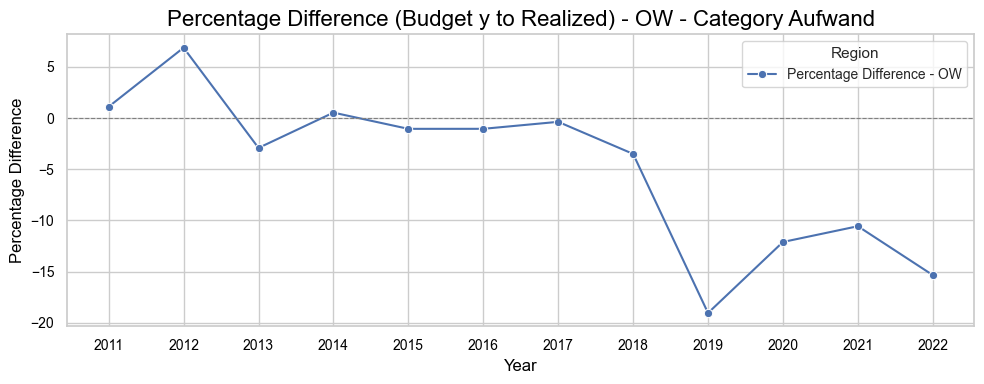

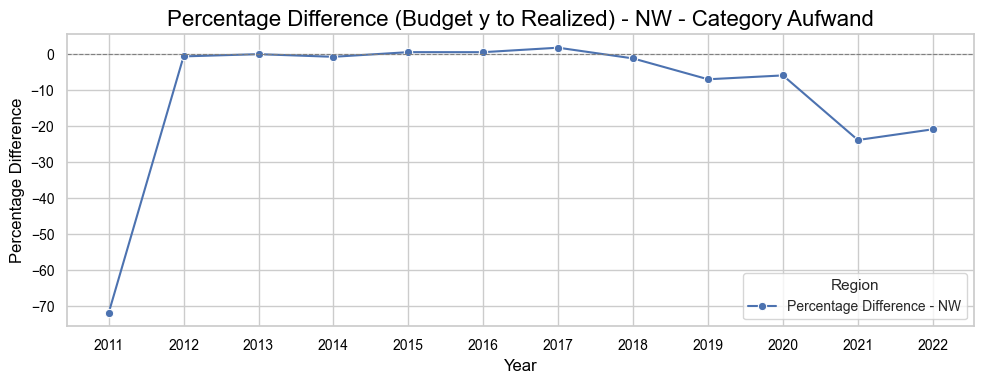

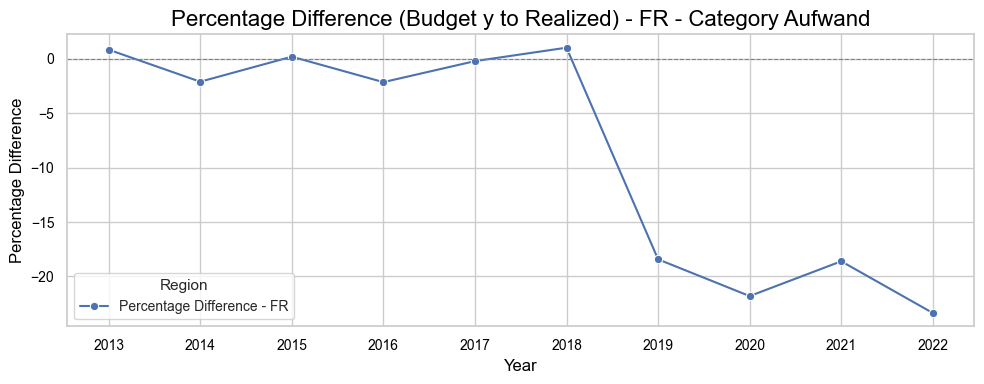

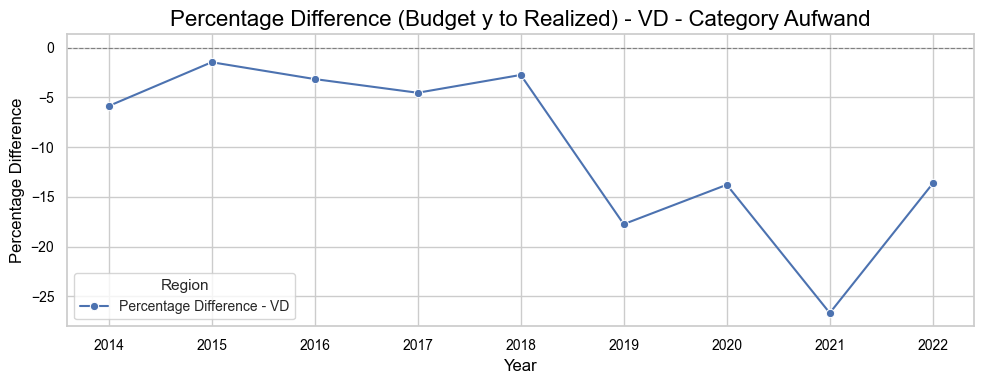

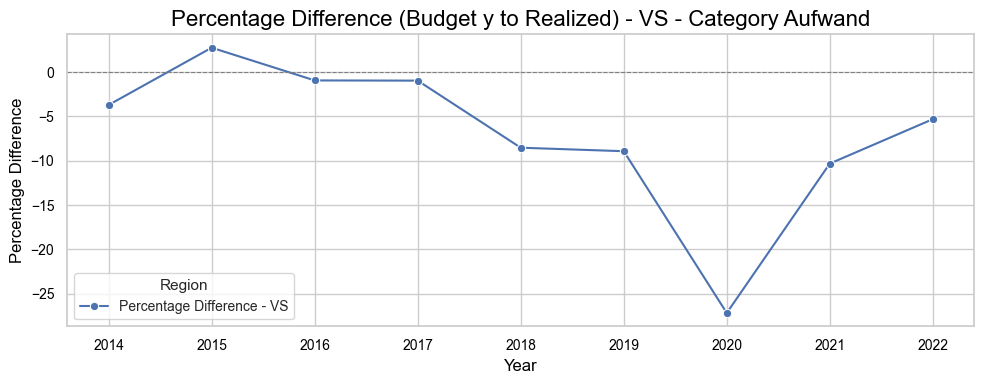

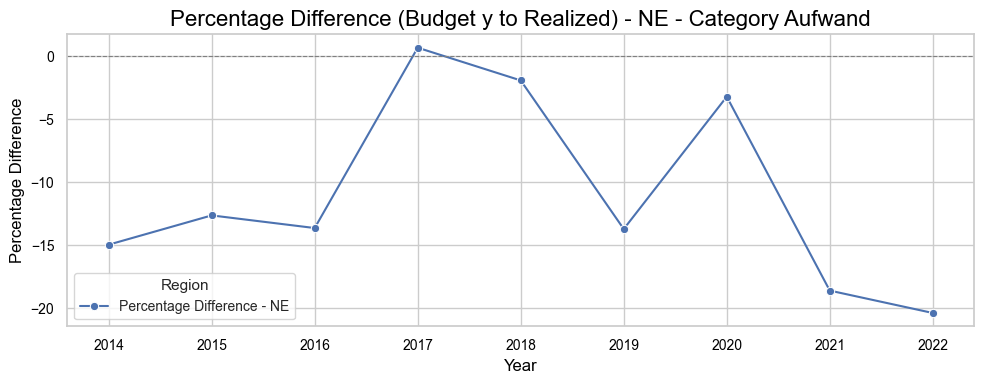

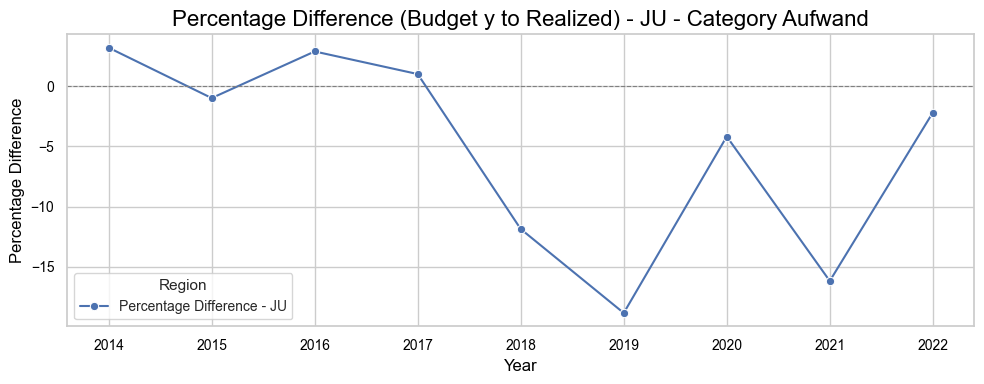

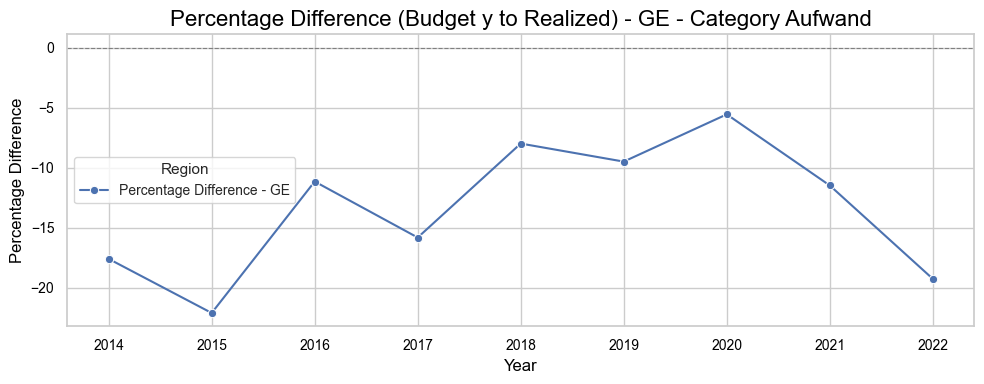

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path

output_dir = 'time_series_additional_plots'
os.makedirs(output_dir, exist_ok=True)

plt.style.use('default')

sns.set(style="whitegrid") 

regions = df['Region'].unique()

for region in regions:
    region_data = df[df['Region'] == region].groupby('Year')['Percentage Difference'].mean().reset_index()
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=region_data, x='Year', y='Percentage Difference', marker='o', linestyle='-', label=f'Percentage Difference - {region}')
    plt.title(f'Percentage Difference (Budget y to Realized) - {region} - Category {CATEGORY}', fontsize=16, color='black')
    plt.xlabel('Year', fontsize=12, color='black')
    plt.ylabel('Percentage Difference', fontsize=12, color='black')
    plt.axhline(0, color='grey', lw=0.8, ls='--') 
    plt.legend(title='Region', fontsize=10, title_fontsize='11', loc='best')
    plt.yticks(fontsize=10, color='black')
    
    years = region_data['Year'].unique()
    plt.xticks(ticks=years, labels=[int(year) for year in years], fontsize=10, color='black')
    
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f"{output_dir}/percentage_difference_{region}_{CATEGORY}.png", bbox_inches='tight')
    plt.show()
